# XGBoost
## Why XGBoost Does Not Need Feature Scaling or Multicollinearity Removal

XGBoost is a **tree-based model** that makes decisions using split rules like `feature < threshold`.  
These splits depend on the **relative order** of values, not their scale, so feature scaling does not change model behavior.

Multicollinearity mainly affects **linear models** by causing unstable coefficients.  
XGBoost does not learn linear coefficients; it selects features at each split and can naturally ignore redundant or highly correlated features.

**In practice:**
- Feature scaling is not required for XGBoost
- Multicollinearity does not harm model performance
- Removing redundant features may still help with speed and interpretability

**Summary:**  
XGBoost focuses on feature ordering and split quality, not feature scale or linear correlations.


In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from xgboost import XGBRegressor

In [6]:
# load dataset
train_df = pd.read_csv("/Users/leduongkhoa/Regression_MachineLearning_End2End/data/processed/encoded_train.csv")
eval_df = pd.read_csv("/Users/leduongkhoa/Regression_MachineLearning_End2End/data/processed/encoded_eval.csv")

In [7]:
# define features and target
target_column = 'price'
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_eval = eval_df.drop(columns=[target_column])
y_eval = eval_df[target_column]

In [8]:
print("Train shape:", X_train.shape)
print("Eval shape:", X_eval.shape)

Train shape: (578878, 39)
Eval shape: (148697, 39)


In [9]:
# XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_eval)

In [10]:
mae = mean_absolute_error(y_eval, y_pred_xgb)
rmse = root_mean_squared_error(y_eval, y_pred_xgb)
r2 = r2_score(y_eval, y_pred_xgb)

print("\nXGBoost Regressor Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


XGBoost Regressor Performance:
MAE: 32574.5770600789
RMSE: 71194.14944588351
R²: 0.9608217302498357


In [11]:
X_train.columns

Index(['year', 'quarter', 'month', 'median_list_price', 'median_ppsf',
       'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings',
       'inventory', 'median_dom', 'avg_sale_to_list', 'sold_above_list',
       'off_market_in_two_weeks', 'bank', 'bus', 'hospital', 'mall', 'park',
       'restaurant', 'school', 'station', 'supermarket', 'Total Population',
       'Median Age', 'Per Capita Income', 'Total Families Below Poverty',
       'Total Housing Units', 'Median Rent', 'Median Home Value',
       'Total Labor Force', 'Unemployed Population',
       'Total School Age Population', 'Total School Enrollment',
       'Median Commute Time', 'lat', 'lng', 'zipcode_freq', 'city_encoded'],
      dtype='object')

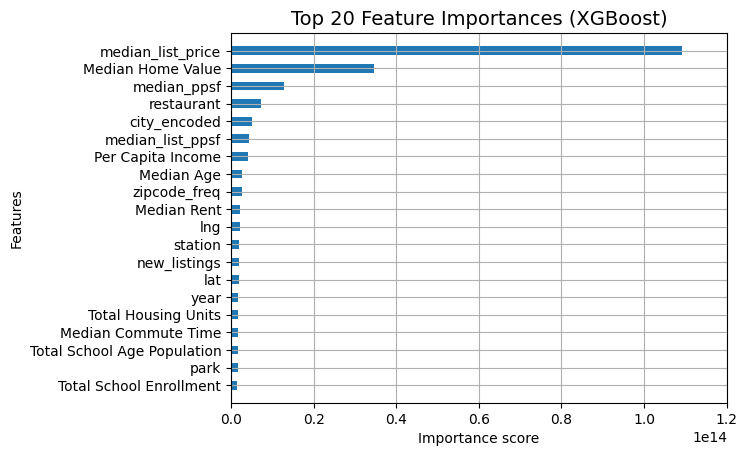

In [12]:
# Plot importances
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(
    xgb_model,
    importance_type="gain",
    max_num_features=20,
    height=0.5,
    show_values=False
)
plt.title("Top 20 Feature Importances (XGBoost)", fontsize=14)
plt.show()